# **Análise de Dados**  

Nome: Ingrid Laila Santana


# **Requisitos:**

Análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

**Nível - Tratamento e Análise**
* Verificar todos os passos da estratégia geral de análise de dados;
* Executar o que for necessário;
* Todos os passos devem ser comentados;
* Realizar no mínimo 3 análises apenas numéricas;
* Realizar plotagens para no mínimo 3 análises;
* Chegar a uma conclusão de sua análise;

**Nivel Infra**
* O Dataset deve ser salvo em ambiente local  (Google Drive) - (bruto e tratado)
* O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado)

# **Sobre os Dados:**


Este conjunto de dados fornece uma visão abrangente dos preços do Airbnb em algumas das cidades europeias mais populares. Cada listagem é avaliada quanto a várias características, como tipos de quartos, classificações de limpeza e satisfação, número de quartos, distância do centro da cidade e muito mais, para obter uma compreensão detalhada dos preços do Airbnb tanto durante a semana quanto nos fins de semana.

Fonte: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

## **Dicionário de Dados:**

As colunas são as seguintes:

realSum: valor de 2 dias para 2 pessoas

room_type: o tipo de acomodação

room_shared: variável fictícia para quartos compartilhados

room_private: variável fictícia para salas privadas

person_capacity: o número máximo de convidados

host_is_superhost: variável fictícia para status de superhost

*Superhosts são anfitriões experientes e muito bem avaliados, comprometidos em fornecer estadias excelentes para seus hóspedes.*

multi: variável fictícia para anúncios oferecidos por hosts com 2 a 4 anúncios.

biz: variável fictícia para anúncios oferecidos por hosts com mais de 4 anúncios.

clean_rating: classificação de limpeza

guest_satisfaction_overall: avaliação geral do anúncio

bedrooms: número de quartos (0 para estúdios)

dist: distância do centro da cidade em km

metro_dist: distância da estação de metrô mais próxima em km

attr_index: índice de atração do local do anúncio

attr_index_norm: índice de atração normalizado (0-100)

rest_index: índice do restaurante do local da listagem

rest_index_norm: índice de restaurante normalizado (0-100)

lng: longitude do local de listagem

lat: latitude do local da listagem

# **Entendendo o Problema**

**5w**

Pergunta-chave: Como identificar possíveis oportunidades e/ou ameaças para o empreendimento?


* **O que?**

  Quais são as ameaças?

  Quais as oportunidade?


* **Quem?**

  Qual o perfil de quartos mais alugados?

  Quais as preferências/ necessidades desses cliente?


* **Onde?**

  Onde devemos procurar por oportunidades e ameaças?

  Onde tem maiores locações?

* **Por que?**

 Por que determinados locais possuem maiores locações?

* **Como?**

  Como os proprietários podem definir preços competitivos?

# **Instalações e Importações**

In [ ]:
# Instalação das bibliotecas gcsfs (permite interagir com a GCP) e pandera (validação do dataframe)
!pip install gcsfs
!pip install pandera

In [ ]:
# Abertura de bibliotecas
import os                           # Importar a biblioteca "os" para interagir com o sistema operacional
import pandas as pd                 # Importar a biblioteca "pandas" e atribuir um apelido "pd"
import numpy as np                  # O numpy é uma biblioteca popular para computação numérica em Python, fornecendo suporte para matrizes multidimensionais, funções matemáticas avançadas e manipulação eficiente de dados numéricos
import pandera as pa                # O pandera é uma biblioteca que adiciona recursos de validação de dados ao pandas, permitindo a definição de esquemas e regras para verificar a qualidade e integridade dos dados.
from google.cloud import storage    # Esse módulo fornece funcionalidades para interagir com o serviço de armazenamento em nuvem do Google Cloud Platform (GCP)
from google.colab import drive      # Comando de abertura para Google Drive
import matplotlib.pyplot as plt     # Abertura de biblioteca de visualização

In [ ]:
# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

# **Extração**

In [ ]:
# Configuração da quantidade de colunas para aparecer em um Datraframe
# O método set_option() é um método do pandas que permite definir opções de exibição. Ele é usado para definir opções como o número máximo de linhas e colunas que o pandas deve exibir ao imprimir um DataFrame.
pd.set_option('display.max_columns',20)

## Extração pelo Google Drive

In [ ]:
# Comando de conexão com o google drive
#drive.mount('/content/drive')

In [ ]:
# Caminho do dataset
#path = '/content/drive/MyDrive/Bootcamp de Analista de Dados/Python/airbnb.csv'
#df = pd.read_csv(path,
#                sep=',',
#               encoding='UTF-8'
#                )

## Extração pelo Google Cloud

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/atividade-gc-251504cb2860.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projetos-aula-soulcode')
bucket.blob('airbnb.csv')
path = 'gs://projetos-aula-soulcode/Projeto Airbnb/Dados Bruto/airbnb.csv'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=',',
                 encoding='UTF-8',
                 dayfirst = True)
dfback = df.copy()

# **Pré - Visualização**

In [ ]:
# Visualização do dataframe
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
# Verificar o tipo de dado em cada coluna
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
# Tamanho ( linhas e colunas) do df
df.shape

(1103, 20)

In [ ]:
# Contar a quantidade de valores não nulos no dataframe
df.count()

Unnamed: 0                    1103
realSum                       1103
room_type                     1103
room_shared                   1103
room_private                  1103
person_capacity               1103
host_is_superhost             1103
multi                         1103
biz                           1103
cleanliness_rating            1103
guest_satisfaction_overall    1103
bedrooms                      1103
dist                          1103
metro_dist                    1103
attr_index                    1103
attr_index_norm               1103
rest_index                    1103
rest_index_norm               1103
lng                           1103
lat                           1103
dtype: int64

In [ ]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

## Backup

In [ ]:
# Backup local do df
dfback1 = df.copy()

# **Transformação**

**Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:**

*  Escolher as possíveis colunas importantes para a análise;
*  Verificar se há colunas iguais;
*  Verificação e tratamento de valores (ou observações) únicos;
*  Verificação e tratamento de duplicadas
*  Verificação e tratamento de inconsistência
*  Verificação e tratamento de valores nulos
*  Tradução/Renomeação
*  Transformação de tipos adequados dos dados
*  Garantia de qualidade e integridade dos dados

## Colunas escolhidas

* realSum
* room_type
* host_is_superhost
* dist
* metro_dist
* lng
* lat
* guest_satisfaction_overall
* clean_rating
* attr_index_norm
* rest_index_norm
* metro_dist
* person_capacity
* bedrooms

## Tradução/Renomeação

In [ ]:
# trduzindo as colunas
df.rename(columns = { 'realSum': 'valor_total',
                     'room_type' : 'tipo_quarto',
                      'host_is_superhost': 'bom_anfitriao',
                      'dist' : 'distancia',
                      'metro_dist': 'dist_metro',
                      'lng': 'longitude',
                      'lat': 'latitude',
                      'guest_satisfaction_overall': 'nivel_satisfacao',
                      'cleanliness_rating': 'nivel_limpeza',
                      'attr_index_norm': 'indice_atracao',
                      'rest_index_norm': 'indice_restaurante',
                      'person_capacity' : 'capacidade',

                      'bedrooms': 'quartos'
                        }, inplace = True)

In [ ]:
# verificando os registros
print(sorted(pd.unique(df['tipo_quarto'])))

['Entire home/apt', 'Private room', 'Shared room']


In [ ]:
# verificando os registros
print(sorted(pd.unique(df['bom_anfitriao'])))

[False, True]


In [ ]:
# traduzindo os registro da coluna tipo_quarto
df.replace(['Private room'], 'QUARTO PRIVADO',inplace=True)
df.replace(['Entire home/apt'], 'CASA/APARTAMENTO INTEIRO',inplace=True)
df.replace(['Shared room'], 'QUARTO COMPARTILHADO',inplace=True)

In [ ]:
df

,Unnamed: 0,valor_total,tipo_quarto,room_shared,room_private,capacidade,bom_anfitriao,multi,biz,nivel_limpeza,nivel_satisfacao,quartos,distancia,dist_metro,attr_index,indice_atracao,rest_index,indice_restaurante,longitude,latitude
0,0,194.033698,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,QUARTO PRIVADO,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,QUARTO PRIVADO,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,QUARTO PRIVADO,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,QUARTO PRIVADO,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,CASA/APARTAMENTO INTEIRO,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,CASA/APARTAMENTO INTEIRO,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


## Transformação de tipos adequados dos dados

In [ ]:
df.dtypes

Unnamed: 0              int64
valor_total           float64
tipo_quarto            object
room_shared              bool
room_private             bool
capacidade            float64
bom_anfitriao            bool
multi                   int64
biz                     int64
nivel_limpeza         float64
nivel_satisfacao      float64
quartos                 int64
distancia             float64
dist_metro            float64
attr_index            float64
indice_atracao        float64
rest_index            float64
indice_restaurante    float64
longitude             float64
latitude              float64
dtype: object

In [ ]:
# Transformação do tipo de dados da coluna capacidade
df['capacidade'] = df['capacidade'].astype(int)

In [ ]:
df

,Unnamed: 0,valor_total,tipo_quarto,room_shared,room_private,capacidade,bom_anfitriao,multi,biz,nivel_limpeza,nivel_satisfacao,quartos,distancia,dist_metro,attr_index,indice_atracao,rest_index,indice_restaurante,longitude,latitude
0,0,194.033698,QUARTO PRIVADO,False,True,2,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,QUARTO PRIVADO,False,True,4,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,QUARTO PRIVADO,False,True,2,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,QUARTO PRIVADO,False,True,4,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,QUARTO PRIVADO,False,True,2,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,CASA/APARTAMENTO INTEIRO,False,False,2,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,QUARTO PRIVADO,False,True,2,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,QUARTO PRIVADO,False,True,2,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,CASA/APARTAMENTO INTEIRO,False,False,4,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.dtypes

Unnamed: 0              int64
valor_total           float64
tipo_quarto            object
room_shared              bool
room_private             bool
capacidade              int64
bom_anfitriao            bool
multi                   int64
biz                     int64
nivel_limpeza         float64
nivel_satisfacao      float64
quartos                 int64
distancia             float64
dist_metro            float64
attr_index            float64
indice_atracao        float64
rest_index            float64
indice_restaurante    float64
longitude             float64
latitude              float64
dtype: object

## Backup

In [ ]:
# Backup local do df com todas as colunas
dfback2 = df.copy()

## Retirada de colunas não analisadas

In [ ]:
# retirada de colunas
df.drop(['multi',
        'room_shared',
        'room_private',
        'attr_index',
        'rest_index',
        'Unnamed: 0',
         'biz'
        ], axis = 1, inplace = True)

In [ ]:
df

,valor_total,tipo_quarto,capacidade,bom_anfitriao,nivel_limpeza,nivel_satisfacao,quartos,distancia,dist_metro,indice_atracao,indice_restaurante,longitude,latitude
0,194.033698,QUARTO PRIVADO,2,False,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772
1,344.245776,QUARTO PRIVADO,4,False,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
2,264.101422,QUARTO PRIVADO,2,False,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103
3,433.529398,QUARTO PRIVADO,4,False,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
4,485.552926,QUARTO PRIVADO,2,True,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,CASA/APARTAMENTO INTEIRO,2,False,10.0,100.0,1,2.375833,1.436054,9.594573,15.699521,4.85869,52.37677
1099,233.637194,QUARTO PRIVADO,2,False,10.0,90.0,1,4.719736,0.322263,5.719989,9.391335,4.83611,52.34910
1100,317.062311,QUARTO PRIVADO,2,False,10.0,92.0,1,0.598355,0.751993,23.323524,43.616927,4.88897,52.37798
1101,1812.855904,CASA/APARTAMENTO INTEIRO,4,False,8.0,84.0,5,1.943020,0.388532,13.658524,23.454022,4.90688,52.35794


## Verificação e Tratamento de inconsistências

O método select_dtypes() é usado para identificar as colunas numéricas, filtrando apenas as colunas do tipo float. Em seguida, o método applymap() é aplicado apenas nas colunas numéricas, arredondando cada valor para duas casas decimais.

In [ ]:
colunas_numericas = df.select_dtypes(include=[float]).columns
df[colunas_numericas] = df[colunas_numericas].applymap(lambda x: round(x, 2))

In [ ]:
df

,valor_total,tipo_quarto,capacidade,bom_anfitriao,nivel_limpeza,nivel_satisfacao,quartos,distancia,dist_metro,indice_atracao,indice_restaurante,longitude,latitude
0,194.03,QUARTO PRIVADO,2,False,10.0,93.0,1,5.02,2.54,4.17,6.85,4.91,52.42
1,344.25,QUARTO PRIVADO,4,False,8.0,85.0,1,0.49,0.24,33.42,58.34,4.90,52.37
2,264.10,QUARTO PRIVADO,2,False,9.0,87.0,1,5.75,3.65,3.99,6.65,4.98,52.36
3,433.53,QUARTO PRIVADO,4,False,9.0,90.0,2,0.38,0.44,26.12,60.97,4.89,52.38
4,485.55,QUARTO PRIVADO,2,True,10.0,98.0,1,0.54,0.32,29.27,56.81,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,CASA/APARTAMENTO INTEIRO,2,False,10.0,100.0,1,2.38,1.44,9.59,15.70,4.86,52.38
1099,233.64,QUARTO PRIVADO,2,False,10.0,90.0,1,4.72,0.32,5.72,9.39,4.84,52.35
1100,317.06,QUARTO PRIVADO,2,False,10.0,92.0,1,0.60,0.75,23.32,43.62,4.89,52.38
1101,1812.86,CASA/APARTAMENTO INTEIRO,4,False,8.0,84.0,5,1.94,0.39,13.66,23.45,4.91,52.36


In [ ]:
df.dtypes

valor_total           float64
tipo_quarto            object
capacidade              int64
bom_anfitriao            bool
nivel_limpeza         float64
nivel_satisfacao      float64
quartos                 int64
distancia             float64
dist_metro            float64
indice_atracao        float64
indice_restaurante    float64
longitude             float64
latitude              float64
dtype: object

In [ ]:
# Verificação de inconsistências de todas as colunas
# laço for percorre todas as colunas

for coluna in df.columns:
    valores_unicos = sorted(df[coluna].unique())
    print(f"Valores únicos da coluna {coluna}:")
    print(valores_unicos)
    print()

Valores únicos da coluna valor_total:
[128.89, 143.65, 144.82, 161.93, 165.68, 167.32, 175.76, 177.16, 178.1, 180.21, 181.85, 184.43, 188.18, 191.69, 192.86, 194.03, 196.61, 198.95, 199.89, 201.53, 202.7, 204.11, 205.28, 206.45, 208.8, 209.03, 210.2, 213.95, 215.12, 217.7, 218.64, 218.87, 221.22, 221.45, 225.67, 227.31, 228.72, 230.83, 232.23, 233.64, 234.57, 237.86, 238.32, 239.5, 239.73, 241.14, 241.84, 242.07, 243.25, 244.42, 245.59, 245.82, 250.51, 250.74, 251.92, 253.32, 254.26, 254.49, 255.43, 255.67, 256.84, 258.01, 258.24, 259.18, 259.41, 261.76, 262.93, 264.1, 264.34, 268.09, 270.43, 271.6, 271.83, 272.54, 274.18, 275.35, 276.29, 276.52, 277.46, 277.69, 277.93, 279.1, 280.04, 281.44, 282.61, 282.85, 283.79, 284.96, 287.77, 288.71, 289.64, 290.11, 291.05, 292.46, 293.63, 295.03, 295.27, 297.61, 298.78, 299.72, 300.89, 301.13, 303.0, 303.47, 304.64, 304.88, 305.81, 306.05, 307.22, 308.39, 309.56, 309.8, 310.74, 310.97, 312.14, 313.31, 313.55, 314.48, 315.89, 316.83, 317.06, 318.

## Verificar se há colunas iguais

In [ ]:
# Verificando se as colunas do tipo float são iguais
# Nome das colunas a serem verificadas
colunas_verificar = ['nivel_satisfacao', 'nivel_limpeza', 'distancia', 'dist_metro', 'longitude', 'latitude', 'indice_atracao', 'indice_restaurante']

# Verificando se as colunas são iguais à coluna 'valor_total'
for coluna in colunas_verificar:
    if (df['valor_total']== df[coluna]).all():
        print(f"A coluna {coluna} é igual à coluna 'valor_total'.")
    else:
        print(f"A coluna {coluna} é diferente da coluna 'valor_total'.")

A coluna nivel_satisfacao é diferente da coluna 'valor_total'.
A coluna nivel_limpeza é diferente da coluna 'valor_total'.
A coluna distancia é diferente da coluna 'valor_total'.
A coluna dist_metro é diferente da coluna 'valor_total'.
A coluna longitude é diferente da coluna 'valor_total'.
A coluna latitude é diferente da coluna 'valor_total'.
A coluna indice_atracao é diferente da coluna 'valor_total'.
A coluna indice_restaurante é diferente da coluna 'valor_total'.


In [ ]:
# Verificando se as colunas do tipo int são iguais
# Nome das colunas a serem verificadas
if (df['capacidade']== df['quartos']).all():
  print("A coluna capacidade é igual à coluna 'quartos'.")
else:
  print("A coluna capacidade é diferente da coluna 'quartos'.")

A coluna capacidade é diferente da coluna 'quartos'.


##  Verificação e tratamento de duplicadas

In [ ]:
# Tamanho ( linhas e colunas) do df
df.shape

(1103, 13)

In [ ]:
# podemos observar que a quantidade de registros é a mesma que a quantidade de colunas
df.count()

valor_total           1103
tipo_quarto           1103
capacidade            1103
bom_anfitriao         1103
nivel_limpeza         1103
nivel_satisfacao      1103
quartos               1103
distancia             1103
dist_metro            1103
indice_atracao        1103
indice_restaurante    1103
longitude             1103
latitude              1103
dtype: int64

In [ ]:
# método duplicated verifica se há linhas duplicadas no dataframe
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1098    False
1099    False
1100    False
1101    False
1102    False
Length: 1103, dtype: bool

## Verificação e tratamento de valores nulos

In [ ]:
# Verificar dados Nulos , ausentes , etc - isnull()
df.isna().sum()

valor_total           0
tipo_quarto           0
capacidade            0
bom_anfitriao         0
nivel_limpeza         0
nivel_satisfacao      0
quartos               0
distancia             0
dist_metro            0
indice_atracao        0
indice_restaurante    0
longitude             0
latitude              0
dtype: int64

## Qualidade e integridade dos Dados

In [ ]:
# Nossas colunas do dataframe
df.dtypes

valor_total           float64
tipo_quarto            object
capacidade              int64
bom_anfitriao            bool
nivel_limpeza         float64
nivel_satisfacao      float64
quartos                 int64
distancia             float64
dist_metro            float64
indice_atracao        float64
indice_restaurante    float64
longitude             float64
latitude              float64
dtype: object

In [ ]:
# Definir o esquema de validação
schema = pa.DataFrameSchema({'valor_total': pa.Column(pa.Float64),
                            'tipo_quarto': pa.Column(pa.String),
                            'capacidade': pa.Column(pa.Int),
                            'bom_anfitriao': pa.Column(pa.Bool),
                            'nivel_limpeza': pa.Column(pa.Float64),
                            'nivel_satisfacao': pa.Column(pa.Float64),
                            'quartos': pa.Column(pa.Int),
                            'distancia': pa.Column(pa.Float64),
                            'dist_metro': pa.Column(pa.Float64),
                            'indice_atracao': pa.Column(pa.Float64),
                            'indice_restaurante': pa.Column(pa.Float64),
                            'longitude': pa.Column(pa.Float64),
                            'latitude': pa.Column(pa.Float64)
                            })

# Validar o DataFrame
schema.validate(df)

,valor_total,tipo_quarto,capacidade,bom_anfitriao,nivel_limpeza,nivel_satisfacao,quartos,distancia,dist_metro,indice_atracao,indice_restaurante,longitude,latitude
0,194.03,QUARTO PRIVADO,2,False,10.0,93.0,1,5.02,2.54,4.17,6.85,4.91,52.42
1,344.25,QUARTO PRIVADO,4,False,8.0,85.0,1,0.49,0.24,33.42,58.34,4.90,52.37
2,264.10,QUARTO PRIVADO,2,False,9.0,87.0,1,5.75,3.65,3.99,6.65,4.98,52.36
3,433.53,QUARTO PRIVADO,4,False,9.0,90.0,2,0.38,0.44,26.12,60.97,4.89,52.38
4,485.55,QUARTO PRIVADO,2,True,10.0,98.0,1,0.54,0.32,29.27,56.81,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,CASA/APARTAMENTO INTEIRO,2,False,10.0,100.0,1,2.38,1.44,9.59,15.70,4.86,52.38
1099,233.64,QUARTO PRIVADO,2,False,10.0,90.0,1,4.72,0.32,5.72,9.39,4.84,52.35
1100,317.06,QUARTO PRIVADO,2,False,10.0,92.0,1,0.60,0.75,23.32,43.62,4.89,52.38
1101,1812.86,CASA/APARTAMENTO INTEIRO,4,False,8.0,84.0,5,1.94,0.39,13.66,23.45,4.91,52.36


## Backup

In [ ]:
# Backup local do df
dfback3 = df.copy()


# **Carregamento**

## Google Drive

In [ ]:
# Google Drive - Utilizar se for o rotulo padrão
# df.to_csv('/content/drive/MyDrive/Bootcamp de Analista de Dados/Python/airbnb_tratado.csv',index=False)

In [ ]:
#Exportação no Google Drive. Obs.: ao fechar o colab esse arquivo some. Recomendação: faça o download e coloque numa pasta do google drive
# df.to_csv('airbnb.csv', index=False)

## Google Cloud

In [ ]:
# Google Cloud
df.to_csv('gs://projetos-aula-soulcode/Projeto Airbnb/Dados Tratados/airbnb_tratado.csv', index=False) # salva no bucket


# **Análises**

## Variáveis tipo quarto e bom anfitrião



O objetivo da análise é investigar se a variável "bom_anfitrião" tem influência nos aluguéis de acordo com o tipo de quarto.

Para isso, foi realizado o cálculo da quantidade de ocorrências de cada tipo de quarto por grupo e a quantidade de ocorrências de "bom_anfitrião" por grupo. Em seguida, foi aplicado um filtro para relacionar essas duas variáveis e obter a contagem de ocorrências para cada caso específico.

In [ ]:
# QTD de tipo de quartos por group by
df.groupby(['tipo_quarto']).size().sort_values(ascending=False)

tipo_quarto
QUARTO PRIVADO              559
CASA/APARTAMENTO INTEIRO    538
QUARTO COMPARTILHADO          6
dtype: int64

In [ ]:
# QTD de bons anfitriões por group by
df.groupby(['bom_anfitriao']).size().sort_values(ascending=False)

bom_anfitriao
False    780
True     323
dtype: int64

In [ ]:
# filtros de tipo quarto (CASA/APARTAMENTO INTEIRO) e bom anfitrião (TRUE)
ft_tipo = df.tipo_quarto == 'CASA/APARTAMENTO INTEIRO'
ft_bom = df.bom_anfitriao == True

df.filtrado_bom_anfitriao = df.loc[ft_tipo & ft_bom]

print('Quantidade de Casas Apartamentos inteiros com bons anfitriões', len(df.filtrado_bom_anfitriao ))

# filtros de tipo quarto (CASA/APARTAMENTO INTEIRO) e bom anfitrião (FALSE)
ft_tipo = df.tipo_quarto == 'CASA/APARTAMENTO INTEIRO'
ft_bom = df.bom_anfitriao == False

df.filtrado_sem_anfitriao  = df.loc[ft_tipo & ft_bom]

print('Quantidade de Casas Apartamentos inteiros SEM bons anfitriões', len(df.filtrado_sem_anfitriao ))

Quantidade de Casas Apartamentos inteiros com bons anfitriões 114
Quantidade de Casas Apartamentos inteiros SEM bons anfitriões 424


In [ ]:
# filtros de tipo quarto (QUARTO COMPARTILHADO) e bom anfitrião (TRUE)
ft_tipo = df.tipo_quarto == 'QUARTO COMPARTILHADO'
ft_bom = df.bom_anfitriao == True

df.quarto_bom_anfi = df.loc[ft_tipo & ft_bom]

print('Quantidade de QUARTOS COMPARTILHADOS com bons anfitriões', len(df.quarto_bom_anfi))

# filtros de tipo quarto (QUARTO COMPARTILHADO) e sem anfitrião (FALSE)
ft_tipo = df.tipo_quarto == 'QUARTO COMPARTILHADO'
ft_bom = df.bom_anfitriao == False

df.quarto_sem_anfi = df.loc[ft_tipo & ft_bom]

print('Quantidade de QUARTOS COMPARTILHADOS SEM bons anfitriões', len(df.quarto_sem_anfi))

Quantidade de QUARTOS COMPARTILHADOS com bons anfitriões 2
Quantidade de QUARTOS COMPARTILHADOS SEM bons anfitriões 4


In [ ]:
# filtros de tipo quarto (QUARTO PRIVADO) e bom anfitrião (True)
ft_tipo = df.tipo_quarto == 'QUARTO PRIVADO'
ft_bom = df.bom_anfitriao == True

df.privado_bom_anfi = df.loc[ft_tipo & ft_bom]

print('Quantidade de QUARTO PRIVADO  com bons anfitriões', len(df.privado_bom_anfi))

# filtros de tipo quarto (QUARTO PRIVADO) e bom anfitrião (False)
ft_tipo = df.tipo_quarto == 'QUARTO PRIVADO'
ft_bom = df.bom_anfitriao == False

df.privado_sem_anfi = df.loc[ft_tipo & ft_bom]

print('Quantidade de QUARTO PRIVADO SEM bons anfitriões', len(df.privado_sem_anfi))


Quantidade de QUARTO PRIVADO  com bons anfitriões 207
Quantidade de QUARTO PRIVADO SEM bons anfitriões 352


## Variáveis tipo quarto e capacidade de pessoas


O objetivo da análise é investigar o perfil dos quartos alugados. Para isso, foram analisadas as variáveis "tipo de quarto" e "capacidade de pessoas".

Utilizando o método *groupby*, verificou-se que a maioria dos quartos possui uma capacidade de 2 pessoas. Com base nessa informação, foram aplicados filtros para selecionar os quartos que correspondem ao tipo de quarto e à capacidade de 2 pessoas, uma vez que essa é a categoria mais comum entre os quartos analisados.

In [ ]:
# QTD da variável capacidade de pessoas no quarto por group by
df.groupby(['capacidade']).size().sort_values(ascending=False)


capacidade
2    656
4    333
3     79
6     24
5     11
dtype: int64

In [ ]:
# filtros de tipo quarto (QUARTO PRIVADO) e capacidade  de 2 pessoas
ft_tipo = df.tipo_quarto == 'QUARTO PRIVADO'
ft_cap = df.capacidade == 2

df.privado_cap2 = df.loc[ft_tipo & ft_cap]

print('Quantidade de QUARTO PRIVADO  com CAPACIDADE PARA 2: ', len(df.privado_cap2))

# filtros de tipo quarto (QUARTO COMPARTILHADO) e capacidade  de 2 pessoas
ft_tipo = df.tipo_quarto == 'QUARTO COMPARTILHADO'
ft_cap = df.capacidade == 2

df.compartilhado_cap2 = df.loc[ft_tipo & ft_cap]

print('Quantidade de QUARTO COMPARTILHADO  com CAPACIDADE PARA 2: ', len(df.compartilhado_cap2))

# filtros de tipo quarto (casa/apartamento inteiro) e capacidade  de 2 pessoas
ft_tipo = df.tipo_quarto == 'CASA/APARTAMENTO INTEIRO'
ft_cap = df.capacidade == 2

df.casa_cap2 = df.loc[ft_tipo & ft_cap]

print('Quantidade de CASA/APARTAMENTO INTEIRO com CAPACIDADE PARA 2: ', len(df.casa_cap2))


Quantidade de QUARTO PRIVADO  com CAPACIDADE PARA 2:  430
Quantidade de QUARTO COMPARTILHADO  com CAPACIDADE PARA 2:  3
Quantidade de CASA/APARTAMENTO INTEIRO com CAPACIDADE PARA 2:  223


## Variáveis "tipo quarto" e "quartos"


O objetivo da análise é investigar o perfil dos quartos alugados. Para isso, foram analisadas as variáveis "tipo de quarto" e "quartos".

Utilizando o método *groupby*, verificou-se que a maioria dos quartos possui 1 quarto. Com base nessa informação, foram aplicados filtros para selecionar os quartos que correspondem ao tipo de quarto e com 1 quarto, uma vez que essa é a categoria mais comum entre os quartos analisados.

In [ ]:
# QTD da variável quartos por group by
df.groupby(['quartos']).size().sort_values(ascending = False)

quartos
1    719
2    218
0     83
3     74
4      7
5      2
dtype: int64

In [ ]:
# filtros de tipo quarto (QUARTO PRIVADO) e c/ 1 quarto
ft_tipo = df.tipo_quarto == 'QUARTO PRIVADO'
ft_quarto = df.quartos == 1

df.privado_quarto = df.loc[ft_tipo & ft_quarto]

print('Quantidade de QUARTO PRIVADO  com 1 quarto: ', len(df.privado_quarto))

# filtros de tipo quarto (QUARTO COMPARTILHADO) e c/ 1 quarto###
ft_tipo = df.tipo_quarto == 'QUARTO COMPARTILHADO'
ft_quarto = df.quartos == 1

df.compartilhado_quarto = df.loc[ft_tipo & ft_quarto]

print('Quantidade de QUARTO COMPARTILHADO com 1 quarto: ', len(df.compartilhado_quarto))

# filtros de tipo quarto (casa/apartamento inteiro) e c/ 1 quarto

ft_tipo = df.tipo_quarto == 'CASA/APARTAMENTO INTEIRO'
ft_quarto = df.quartos == 1

df.casa_quarto = df.loc[ft_tipo & ft_quarto]

print('Quantidade de CASA/APARTAMENTO INTEIRO com 1 quarto:  ', len(df.casa_quarto))

Quantidade de QUARTO PRIVADO  com 1 quarto:  458
Quantidade de QUARTO COMPARTILHADO com 1 quarto:  6
Quantidade de CASA/APARTAMENTO INTEIRO com 1 quarto:   255


## Varíaveis nível de satisfação e tipo de quarto

O objetivo é analisar o nível de satisfação por tipo de quarto. Para isso, foi calculado a média, mediana, moda e desvio padrão do nível de satisfação para cada tipo de quarto. Isso pode fornecer uma visão mais completa da distribuição dos dados e ajudar a entender como o nível de satisfação varia por tipo de quarto.

In [ ]:
# Agrupando o DataFrame pela coluna 'tipo_quarto'
grouped = df.groupby('tipo_quarto')

# Calculando a média do nível de satisfação por tipo de quarto
mean = grouped['nivel_satisfacao'].mean().round(2)

# Calculando a mediana do nível de satisfação por tipo de quarto
median = grouped['nivel_satisfacao'].median().round(2)

# Calculando a moda do nível de satisfação por tipo de quarto
mode = grouped['nivel_satisfacao'].agg(lambda x: x.mode().iat[0]).round(2)

# Calculando o desvio padrão do nível de satisfação por tipo de quarto
std = grouped['nivel_satisfacao'].std().round(2)

# Imprimindo os resultados
print('Média do nível de satisfação por tipo de quarto:')
print(mean)
print('\nMediana do nível de satisfação por tipo de quarto:')
print(median)
print('\nModa do nível de satisfação por tipo de quarto:')
print(mode)
print('\nDesvio padrão do nível de satisfação por tipo de quarto:')
print(std)

Média do nível de satisfação por tipo de quarto:
tipo_quarto
CASA/APARTAMENTO INTEIRO    95.21
QUARTO COMPARTILHADO        92.83
QUARTO PRIVADO              93.56
Name: nivel_satisfacao, dtype: float64

Mediana do nível de satisfação por tipo de quarto:
tipo_quarto
CASA/APARTAMENTO INTEIRO    96.0
QUARTO COMPARTILHADO        94.5
QUARTO PRIVADO              95.0
Name: nivel_satisfacao, dtype: float64

Moda do nível de satisfação por tipo de quarto:
tipo_quarto
CASA/APARTAMENTO INTEIRO    100.0
QUARTO COMPARTILHADO         84.0
QUARTO PRIVADO              100.0
Name: nivel_satisfacao, dtype: float64

Desvio padrão do nível de satisfação por tipo de quarto:
tipo_quarto
CASA/APARTAMENTO INTEIRO    5.20
QUARTO COMPARTILHADO        5.08
QUARTO PRIVADO              6.76
Name: nivel_satisfacao, dtype: float64


Visto que a variável “nível de satisfação” é uma variável quantitativa contínua, eu apliquei um filtro para selecionar valores dentro de um intervalo específico. Para determinar o intervalo, calculei a média e o desvio padrão da variável e usei esses valores para definir os limites inferior e superior do intervalo como (média - desvio padrão) e (média + desvio padrão), respectivamente. Dessa forma, selecionei apenas os valores de “nível de satisfação” que estão dentro de um desvio padrão da média.

In [ ]:
# filtros de tipo quarto (QUARTO PRIVADO ) e c/ o intervalo do nível de satisfação do quarto privado
ft_tipo = df.tipo_quarto == 'QUARTO PRIVADO'
ft_nivel = (df['nivel_satisfacao'] >= 86.8) & (df['nivel_satisfacao'] <= 100.32)

df.privado_nivel = df.loc[ft_tipo & ft_nivel]

print('Quantidade de QUARTO PRIVADO com nível de satisfação próximo a 93.56: ', len(df.privado_nivel))

# filtros de tipo quarto (QUARTO compartilhado ) e c/ o intervalo do nível de satisfação do quarto compartilhado
ft_tipo = df.tipo_quarto == 'QUARTO COMPARTILHADO'
ft_nivel_compar =(df['nivel_satisfacao'] >= 87.75) & (df['nivel_satisfacao'] <= 97.91)

df.compartilhado_nivel = df.loc[ft_tipo & ft_nivel_compar]

print('Quantidade de QUARTO COMPARTILHADO com nível de satisfação próximo a 92.83: ', len(df.compartilhado_nivel))

# filtros de tipo quarto (casa/apartamentoO ) e c/ o intervalo do nível de satisfação da casa/apartamento

ft_tipo = df.tipo_quarto == 'CASA/APARTAMENTO INTEIRO'
ft_nivel_casa = (df['nivel_satisfacao'] >= 90.01) & (df['nivel_satisfacao'] <= 100.41)

df.casa_nivel= df.loc[ft_tipo & ft_nivel_casa]

print('Quantidade de CASA/APARTAMENTO INTEIRO com nível de satisfação próximo a 95.21:  ', len(df.casa_nivel))


Quantidade de QUARTO PRIVADO com nível de satisfação próximo a 93.56:  500
Quantidade de QUARTO COMPARTILHADO com nível de satisfação próximo a 92.83:  4
Quantidade de CASA/APARTAMENTO INTEIRO com nível de satisfação próximo a 95.21:   457


In [ ]:
# Calculo de porcentagem do filtro acima com o total de nível de satisfação

# calculando o total de níveis de satisfação
total = df.groupby('tipo_quarto').size()

# atribuindo as variáveis para guardar as quantidades de cada filtro
valor_compartilhado = len(df.compartilhado_nivel)
valor_casa =  len(df.casa_nivel)
valor_privado = len(df.privado_nivel)

# calculo do percentual sendo o if usado para verificar tratar o erro de divisão por 0
if 'QUARTO COMPARTILHADO' in total:
    per_compartilhado = (valor_compartilhado / total['QUARTO COMPARTILHADO']) * 100
    print('Percentual do quarto compartilhado com nível de satisfação próximo a 92.83:', round(per_compartilhado, 1), '%')

if 'CASA/APARTAMENTO INTEIRO' in total:
    per_casa = (valor_casa / total['CASA/APARTAMENTO INTEIRO']) * 100
    print('Percentual da casa/apartamento inteiro com nível de satisfação próximo a 95.21:', round(per_casa, 1), '%')

if 'QUARTO PRIVADO' in total:
    per_privado = (valor_privado / total['QUARTO PRIVADO']) * 100
    print('Percentual da QUARTO PRIVADO com nível de satisfação próximo a 93.56:', round(per_privado, 1), '%')

Percentual do quarto compartilhado com nível de satisfação próximo a 92.83: 66.7 %
Percentual da casa/apartamento inteiro com nível de satisfação próximo a 95.21: 84.9 %
Percentual da QUARTO PRIVADO com nível de satisfação próximo a 93.56: 89.4 %


## Varíaveis nível de limpeza e tipo de quarto


O objetivo é analisar o nível de limpeza por tipo de quarto. Para isso, foi calculado a média, mediana, moda e desvio padrão do nível de limpeza para cada tipo de quarto. Isso pode fornecer uma visão mais completa da distribuição dos dados e ajudar a entender como o nível de limpeza varia por tipo de quarto.

Obs: O modelo de cálculo foi o mesmo seguido pelas variáveis nível de satisfação e tipo quarto.

In [ ]:
# Agrupando o DataFrame pela coluna 'tipo_quarto'
grouped = df.groupby('tipo_quarto')

# Calculando a média do nível de limpeza por tipo de quarto
mean = grouped['nivel_limpeza'].mean().round(2)

# Calculando a mediana do nível de limpeza por tipo de quarto
median = grouped['nivel_limpeza'].median().round(2)

# Calculando a moda do do nível de limpeza por tipo de quarto
mode = grouped['nivel_limpeza'].agg(lambda x: x.mode().iat[0]).round(2)

# Calculando o desvio padrão do do nível de limpeza por tipo de quarto
std = grouped['nivel_limpeza'].std().round(2)

# Imprimindo os resultados
print('Média do nivel de limpeza por tipo de quarto:')
print(mean)
print('\nMediana do nivel de limpeza por tipo de quarto:')
print(median)
print('\nModa do nivel de limpeza por tipo de quarto:')
print(mode)
print('\nDesvio padrão do nivel de limpeza por tipo de quarto:')
print(std)

Média do nivel de limpeza por tipo de quarto:
tipo_quarto
CASA/APARTAMENTO INTEIRO    9.44
QUARTO COMPARTILHADO        9.17
QUARTO PRIVADO              9.49
Name: nivel_limpeza, dtype: float64

Mediana do nivel de limpeza por tipo de quarto:
tipo_quarto
CASA/APARTAMENTO INTEIRO    10.0
QUARTO COMPARTILHADO         9.5
QUARTO PRIVADO              10.0
Name: nivel_limpeza, dtype: float64

Moda do nivel de limpeza por tipo de quarto:
tipo_quarto
CASA/APARTAMENTO INTEIRO    10.0
QUARTO COMPARTILHADO        10.0
QUARTO PRIVADO              10.0
Name: nivel_limpeza, dtype: float64

Desvio padrão do nivel de limpeza por tipo de quarto:
tipo_quarto
CASA/APARTAMENTO INTEIRO    0.78
QUARTO COMPARTILHADO        0.98
QUARTO PRIVADO              0.81
Name: nivel_limpeza, dtype: float64


In [ ]:
# filtros de tipo quarto (QUARTO PRIVADO ) e c/ o intervalo do nível de limpeza do quarto privado
ft_tipo = df.tipo_quarto == 'QUARTO PRIVADO'
ft_limp_priv = (df['nivel_limpeza'] >= 8.68) & (df['nivel_limpeza'] <= 10.3)

df.privado_limp = df.loc[ft_tipo & ft_limp_priv]

print('Quantidade de QUARTO PRIVADO com nivel de limpeza próximo a 9,49: ', len(df.privado_limp))

# filtros de tipo quarto (QUARTO COMPARTILHADO ) e c/ o intervalo do nível de limpeza do quarto compartilhado
ft_tipo = df.tipo_quarto == 'QUARTO COMPARTILHADO'
ft_limp_comp =(df['nivel_limpeza'] >= 8.19) & (df['nivel_limpeza'] <= 10.15)

df.compartilhado_limp = df.loc[ft_tipo & ft_limp_comp]

print('Quantidade de QUARTO COMPARTILHADO com nivel de limpeza próximo a 9,17: ', len(df.compartilhado_limp))

# filtros de tipo quarto (casa/aparto) e c/ o intervalo do nível de limpeza da casa/apto

ft_tipo = df.tipo_quarto == 'CASA/APARTAMENTO INTEIRO'
ft_limp_casa = (df['nivel_limpeza'] >= 9.22) & (df['nivel_limpeza'] <= 10.78)

df.casa_limp= df.loc[ft_tipo & ft_limp_casa]

print('Quantidade de CASA/APARTAMENTO INTEIRO com nivel de limpeza próximo a 9,44:  ', len(df.casa_limp))


Quantidade de QUARTO PRIVADO com nivel de limpeza próximo a 9,49:  508
Quantidade de QUARTO COMPARTILHADO com nivel de limpeza próximo a 9,17:  4
Quantidade de CASA/APARTAMENTO INTEIRO com nivel de limpeza próximo a 9,44:   311


In [ ]:
# Calculo de porcentagem do filtro acima com o total de nível de limpeza

# calculando o total de níveis de satisfação
total = df.groupby('tipo_quarto').size()

# atribuindo as variáveis para guardar as quantidades de cada filtro
valor_compartilhado_limp = len(df.compartilhado_limp)
valor_casa_limp =  len(df.casa_limp)
valor_privado_limp = len(df.privado_limp)

# calculo do percentual sendo o if usado para verificar tratar o erro de divisão por 0
if 'QUARTO COMPARTILHADO' in total:
    per_compartilhado = (valor_compartilhado_limp / total['QUARTO COMPARTILHADO']) * 100
    print('Percentual do quarto compartilhado com nível de limpeza próximo a 9.17:', round(per_compartilhado, 1), '%')

if 'CASA/APARTAMENTO INTEIRO' in total:
    per_casa = (valor_casa_limp / total['CASA/APARTAMENTO INTEIRO']) * 100
    print('Percentual da casa/apartamento inteiro com nível de limpeza próximo a 9.44:', round(per_casa, 1), '%')

if 'QUARTO PRIVADO' in total:
    per_privado = (valor_privado_limp / total['QUARTO PRIVADO']) * 100
    print('Percentual da QUARTO PRIVADO com nível de limpeza próximo a 9.49:', round(per_privado, 1), '%')

Percentual do quarto compartilhado com nível de limpeza próximo a 9.17: 66.7 %
Percentual da casa/apartamento inteiro com nível de limpeza próximo a 9.44: 57.8 %
Percentual da QUARTO PRIVADO com nível de limpeza próximo a 9.49: 90.9 %


Cálculo da correlação entre o nível de limpeza e nível de satisfação do cliente com os quartos ou casa/apto alugados.

Observa-se que existe uma correlação positiva moderada, indicando que à medida que o nível de limpeza aumenta, o nível de satisfação do cliente também tende a aumentar.

In [ ]:
# Calculando a correlação entre a limpeza e o nível de satisfação
correlation = df['nivel_limpeza'].corr(df['nivel_satisfacao'])

# Imprimindo o resultado
print('Correlação entre limpeza e nível de satisfação:', correlation)

Correlação entre limpeza e nível de satisfação: 0.6488091506956638


## Varíavel distancia

Na variável "distancia", que representa a distância do imóvel alugado ao centro da cidade, foram calculadas as correlações com o valor do aluguel, nível de satisfação e capacidade de pessoas, a fim de verificar se a distância tem influência nos aluguéis.

**Correlação entre distância e valor total**

Podemos observar que há uma correlação negativa muito fraca entre as variáveis "distancia" e "valor do aluguel". Isso indica que há pouca ou nenhuma relação linear entre elas, ou seja, a distância não parece estar influenciando significativamente o valor do aluguel.

In [ ]:
# Calculando a correlação entre a distância e valor_total
correlation = df['distancia'].corr(df['valor_total'])

# Imprimindo o resultado
print('Correlação entre distância e nível de satisfação:', correlation)

Correlação entre distância e nível de satisfação: -0.2586665159945731


**Correlação entre distância e nível de satisfação**

Podemos observar uma ausência de correlação entre as variáveis. Porém, vale ressaltar que a ausência de correlação não significa necessariamente que não existe relação entre as variáveis, uma vez que pode haver uma relação não linear ou outros tipos de relações complexas que não são capturadas pela correlação linear.


In [ ]:
# Calculando a correlação entre a distância e o nível de satisfação
correlation = df['distancia'].corr(df['nivel_satisfacao'])

# Imprimindo o resultado
print('Correlação entre distância e nível de satisfação:', correlation)

Correlação entre distância e nível de satisfação: -0.059847943815665036


**Correlação entre distância e capacidade**

Novamente, podemos observar ausência de correlação entre as variáveis.

In [ ]:
# Calculando a correlação entre a distância ecapacidade
correlation = df['distancia'].corr(df['capacidade'])

# Imprimindo o resultado
print('Correlação entre distância e nível de satisfação:', correlation)

Correlação entre distância e nível de satisfação: -0.046395254144697494


O segundo cálculo realizado com a variável “distância” foi o uso do método groupby para agrupar o DataFrame pelas colunas "tipo_quarto" e "bom_anfitriao", e o cálculo de estatísticas descritivas para a coluna "distancia" em cada grupo. Isso pode ajudar a entender como a distância ao centro varia por tipo de quarto e qualidade do anfitrião.

In [ ]:
# Agrupando o DataFrame pelas colunas 'tipo_quarto' e 'bom_anfitriao'
grouped = df.groupby(['tipo_quarto', 'bom_anfitriao'])

# Calculando estatísticas descritivas para a coluna 'distancia' em cada grupo
result = grouped['distancia'].agg(['count', 'mean', 'median', 'std']).round(2)

# Imprimindo o resultado
print(result)

                                        count  mean  median   std
tipo_quarto              bom_anfitriao                           
CASA/APARTAMENTO INTEIRO False            424  2.66    2.46  1.64
                         True             114  2.42    1.90  1.85
QUARTO COMPARTILHADO     False              4  3.82    2.80  3.96
                         True               2  4.28    4.28  4.09
QUARTO PRIVADO           False            352  3.00    2.28  2.56
                         True             207  3.15    2.85  2.21


## Varíavel índice de atração


Na variável "indice_atracao", que representa o índice de atração turística de 0 a 100 do imóvel alugado, foram calculadas as correlações com a distância, o valor total e o nível de satisfação, a fim de verificar se o índice de atração tem influência nos aluguéis.

**Correlação entre distância e índice de atração**

Podemos observar uma correlação negativa forte entre as variáveis "distancia" e "indice_atracao". Isso indica que, provavelmente, as atrações turísticas estão mais próximas do centro da cidade.

In [ ]:
# Calculando a correlação entre a indice de atração e a distancia
correlation = df['indice_atracao'].corr(df['distancia'])

# Imprimindo o resultado
print('Correlação entre distância e nível de satisfação:', correlation)

Correlação entre distância e nível de satisfação: -0.7053107912292047


**Correlação entre o índice de atração e o valor total**

Ao analisar a correlação entre as variáveis "indice_atracao" e "valor_total", podemos observar uma correlação positiva fraca. Isso indica que há pouca ou nenhuma relação linear entre essas variáveis, sugerindo que as atrações turísticas não têm influência significativa no valor do aluguel.

In [ ]:
# Calculando a correlação entre o indice de atração e valor total
correlation = df['indice_atracao'].corr(df['valor_total'])

# Imprimindo o resultado
print('Correlação entre distância e nível de satisfação:', correlation)

Correlação entre distância e nível de satisfação: 0.24418885445662566


**Correlação entre o índice de atração e o nível de satisfação**

 Ao analisar a correlação entre as variáveis "indice_atracao" e "nivel_satisfacao", podemos observar que não há correlação entre elas. Isso indica que as atrações turísticas não têm influência no nível de satisfação dos clientes.

In [ ]:
# Calculando a correlação entre o indice de atração e nivel de satisfacao
correlation = df['indice_atracao'].corr(df['nivel_satisfacao'])

# Imprimindo o resultado
print('Correlação entre distância e nível de satisfação:', correlation)

Correlação entre distância e nível de satisfação: 0.006311513514381782


## Varíavel índice de restaurante


Na variável "indice_restaurante", que representa o índice dos restaurantes de 0 a 100, foram calculadas as correlações com a distância, índice de atração e o nível de satisfação, a fim de verificar se o índice de restaurante tem influência nos aluguéis.

**Correlação entre índice de atração e índice do restaurante**

Podemos observar que há uma correlação forte positiva entre as variáveis "indice_atracao" e "indice_restaurante". Isso indica que, à medida que uma variável aumenta, a outra também tende a aumentar proporcionalmente. Com base nessa observação, podemos formular a hipótese de que as atrações turísticas influenciam o índice dos restaurantes. Além disso, a concentração das atrações no centro pode estar contribuindo para essa correlação.

In [ ]:
# Calculando a correlação entre indice de atracao e o indice de restaurante
correlation = df['indice_atracao'].corr(df['indice_restaurante'])

# Imprimindo o resultado
print('Correlação entre indice de atracao e o indice de restaurante:', correlation)

Correlação entre indice de atracao e o indice de restaurante: 0.8612577515837054


**Correlação entre índice do restaurante e distância**

Podemos observar uma correlação forte negativa entre o índice do restaurante e a distância. Isso sugere que quanto menor a distância do imóvel ao centro, maior é o índice de satisfação com os restaurantes. Provavelmente os restaurantes localizados no centro são bem avaliados pelos clientes, no entanto, essa correlação não indica uma influência direta dos restaurantes na satisfação global dos clientes, conforme a correlação abaixo.


In [ ]:
# Calculando a correlação entre a indice_restaurante e 'distancia
correlation = df['indice_restaurante'].corr(df['distancia'])

# Imprimindo o resultado
print('Correlação entre a indice do restaurante e distancia', correlation)

Correlação entre a indice do restaurante e distancia -0.751611731950579


**Correlação entre índice do restaurante e nível de satisfação**

Não foi identificada uma correlação significativa entre as variáveis, sugerindo que os restaurantes podem não ter um impacto direto na satisfação geral dos clientes.

In [ ]:
# Calculando a correlação entre a indice do restaurante e o nível de satisfação
correlation = df['indice_restaurante'].corr(df['nivel_satisfacao'])

# Imprimindo o resultado
print('Correlação entre índice do restaurante e nível de satisfação:', correlation)

Correlação entre índice do restaurante e nível de satisfação: -0.004932197305127885


## Varíavel "dist_metro"

Na variável "dist_metro", que representa distância da estação de metrô mais próxima em km, foi calculada a correlação entre distância e "dist_metro", a fim de verificar se as estações de mêtro estão próximas do centro.

**Correlação entre distância e distância mêtro**

Podemos observar uma correlação moderada positiva entre as variáveis. Isso indica que existe uma relação linear entre elas, sugerindo que as estações de metrô possam estar localizadas próximas ao centro. Essa correlação sugere que os imóveis analisados estão bem localizados, uma vez que a proximidade das estações de metrô é um indicativo de uma boa localização em termos de acessibilidade e conveniência para os locatários.

In [ ]:
# Calculando a correlação entre a distância e o dist_metro
correlation = df['distancia'].corr(df['dist_metro'])

# Imprimindo o resultado
print('Correlação entre distância do centro ao imóvel e a distância do mêtro:', correlation)

Correlação entre distância do centro ao imóvel e a distância do mêtro: 0.41198244535676254


# **Estatística Geral**

Estatística Descritiva de todas as colunas selecionadas

Tradução das colunas:

* count - contagem
* mean - média
* std - desvio padrão
* min - valor mínimo
* 25% - Q1
* 50% - mediana
* 75% - Q3
* max - valor máximo

In [ ]:
# Estatística Descritiva de todas as colunas selecionadas

# Executar describe() para todas as colunas
descricao = df.describe()

# Arredondar apenas colunas desejadas
colunas = ['capacidade', 'quartos']
descricao[colunas] = descricao[colunas].round(0)

print(descricao.round(2))


       valor_total  capacidade  nivel_limpeza  nivel_satisfacao  quartos  \
count      1103.00      1103.0        1103.00           1103.00   1103.0   
mean        545.02         3.0           9.46             94.36      1.0   
std         416.97         1.0           0.80              6.09      1.0   
min         128.89         2.0           4.00             20.00      0.0   
25%         309.80         2.0           9.00             92.00      1.0   
50%         430.25         2.0          10.00             96.00      1.0   
75%         657.32         4.0          10.00             98.00      2.0   
max        7782.91         6.0          10.00            100.00      5.0   

       distancia  dist_metro  indice_atracao  indice_restaurante  longitude  \
count    1103.00     1103.00         1103.00             1103.00    1103.00   
mean        2.84        1.09           14.35               23.80       4.89   
std         2.12        0.84           10.43               16.49       0.04   

# **Visualização de Dados**

## Gráfico da relação tipo quarto x bom anfitrião

Text(0.5, 1.0, 'Contagem de Tipo de Quarto por Bom Anfitrião')

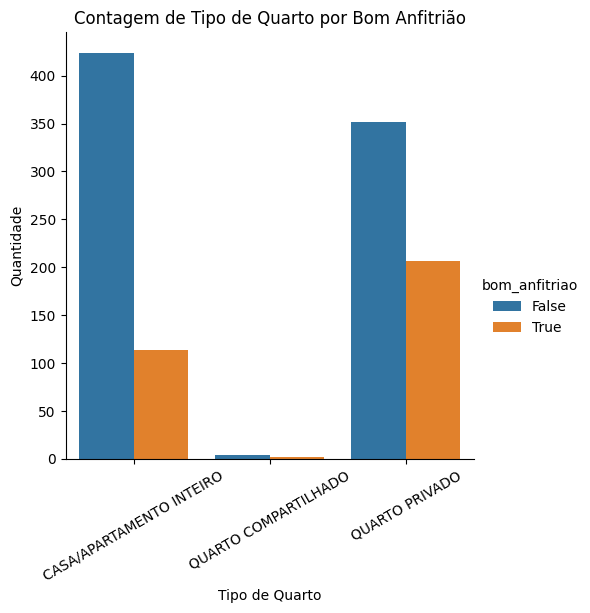

In [ ]:
import seaborn as sns

# Agrupando o DataFrame pelas colunas 'tipo_quarto' e 'bom_anfitriao'
grouped = df.groupby(['tipo_quarto', 'bom_anfitriao']).size().reset_index(name='count')

# Criando um gráfico de barras empilhadas
g = sns.catplot(x='tipo_quarto', y='count', hue='bom_anfitriao', data=grouped, kind='bar')

# Ajustando os nomes das colunas x e y
g.set(xlabel='Tipo de Quarto', ylabel='Quantidade')
g.set_xticklabels(rotation=30)

# Título do gráfico
g.ax.set_title('Contagem de Tipo de Quarto por Bom Anfitrião')

**Observações:**

Com base no gráfico acima, é possível observar uma possível influência da variável "bom_anfitrião" na quantidade de aluguéis de "casa/apartamento inteiro" e "quarto privado".

No entanto, vale ressaltar que essa é apenas uma observação preliminar a partir do gráfico. Para ter uma compreensão mais precisa e confirmar a influência da variável "bom_anfitrião" na quantidade de aluguéis, é necessário realizar uma análise estatística mais aprofundada.

## Gráfico da relação tipo quarto x capacidade

[Text(0, 0, 'CASA/APARTAMENTO INTEIRO'),
 Text(1, 0, 'QUARTO COMPARTILHADO'),
 Text(2, 0, 'QUARTO PRIVADO')]

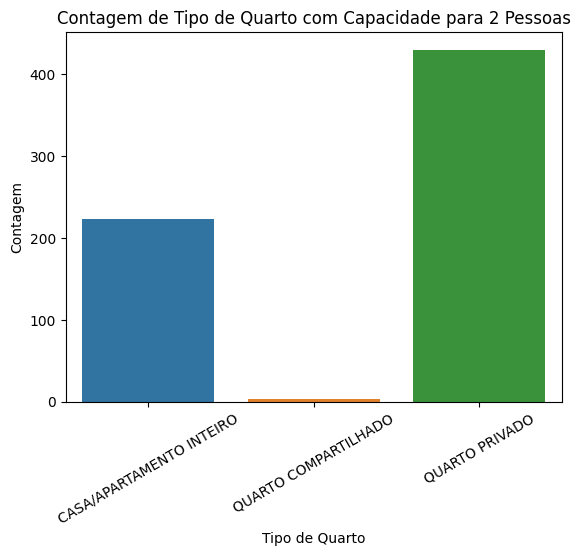

In [ ]:
import seaborn as sns

# Filtrando o DataFrame para selecionar apenas quartos com capacidade para 2 pessoas
filtered = df[df['capacidade'] == 2]

# Agrupando o DataFrame filtrado pela coluna 'tipo_quarto'
grouped = filtered.groupby('tipo_quarto').size().reset_index(name='count')

# Criando um gráfico de barras
ax = sns.barplot(x='tipo_quarto', y='count', data=grouped)

# Adicionando um título ao gráfico
ax.set_title('Contagem de Tipo de Quarto com Capacidade para 2 Pessoas')

# Adicionando legendas às colunas x e y
ax.set_xlabel('Tipo de Quarto')
ax.set_ylabel('Contagem')

# Rotacionando os rótulos da coluna x
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


**Observações:**

Conforme observado no gráfico acima, a maioria dos quartos com capacidade para 2 pessoas é de tipo privado.

## Gráfico da relação tipo quarto x quartos

[Text(0, 0, 'CASA/APARTAMENTO INTEIRO'),
 Text(1, 0, 'QUARTO COMPARTILHADO'),
 Text(2, 0, 'QUARTO PRIVADO')]

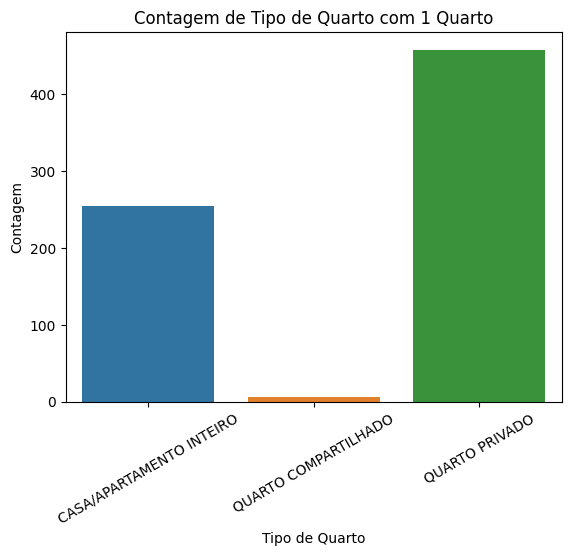

In [ ]:
import seaborn as sns

# Filtrando o DataFrame para selecionar apenas 1 quarto
filtered = df[df['quartos'] == 1]

# Agrupando o DataFrame filtrado pela coluna 'tipo_quarto'
grouped = filtered.groupby('tipo_quarto').size().reset_index(name='count')

# Criando um gráfico de barras
ax = sns.barplot(x='tipo_quarto', y='count', data=grouped)

# Adicionando um título ao gráfico
ax.set_title('Contagem de Tipo de Quarto com 1 Quarto')

# Adicionando legendas às colunas x e y
ax.set_xlabel('Tipo de Quarto')
ax.set_ylabel('Contagem')

# Rotacionando os rótulos da coluna x
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


**Observações:**

Conforme observado no gráfico acima, a maioria dos imóveis alugados possui 1 quarto e é de tipo privado.

## Gráfico da variável tipo de quarto e nível de satisfação

[Text(0, 0, 'QUARTO PRIVADO'),
 Text(1, 0, 'CASA/APARTAMENTO INTEIRO'),
 Text(2, 0, 'QUARTO COMPARTILHADO')]

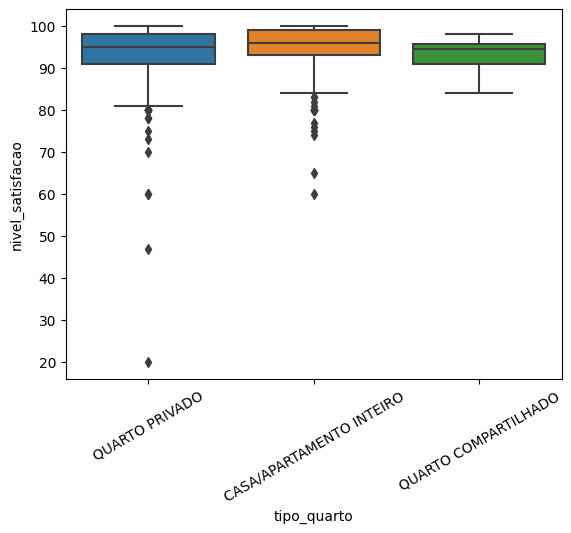

In [ ]:
import seaborn as sns

# Criando um gráfico de box plot
ax = sns.boxplot(x='tipo_quarto', y='nivel_satisfacao', data=df)

# Rotacionando os rótulos da coluna x
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

**Observações**

O gráfico de boxplot possui o eixo x representando as categorias do tipo de quarto, enquanto o eixo y representa o nível de satisfação. Esse gráfico mostra a distribuição do nível de satisfação para cada categoria do tipo de quarto.

Conforme observado no gráfico acima, é possível notar que o nível de satisfação dos quartos ou casas/apartamentos está concentrado entre 90 e 100. Isso indica um alto nível de satisfação por parte dos clientes.

## Gráfico de correlação entre nível de limpeza e nível de satisfação

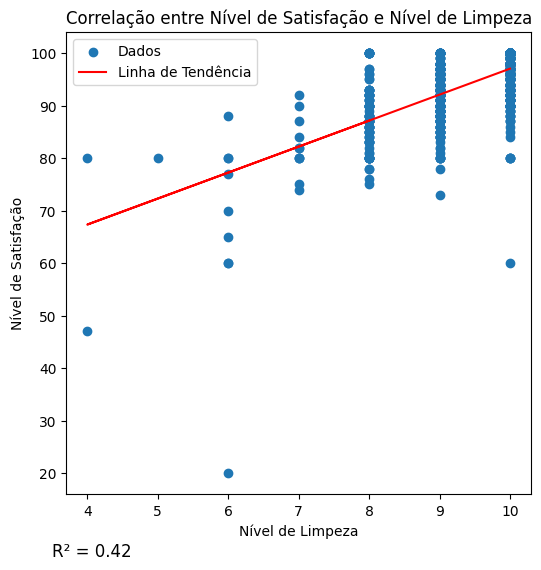

In [ ]:
# importada a biblioteca scipy.stats para usar a linha de tendência e calcula o R^^2
from scipy.stats import linregress

# Cálculo da linha de tendência e do coeficiente de determinação (R^^2)
slope, intercept, r_value, p_value, std_err = linregress(df['nivel_limpeza'], df['nivel_satisfacao'])
line = slope * df['nivel_limpeza'] + intercept
r_squared = r_value ** 2

# Plotagem do gráfico de dispersão com linha de tendência
plt.figure(figsize=(6, 6))
plt.scatter(df['nivel_limpeza'], df['nivel_satisfacao'], label='Dados')
plt.plot(df['nivel_limpeza'], line, color='red', label='Linha de Tendência')  # o plt.plot plota a linha de tendência no gráfico
plt.xlabel('Nível de Limpeza')
plt.ylabel('Nível de Satisfação')
plt.title('Correlação entre Nível de Satisfação e Nível de Limpeza')
plt.legend()

# Inclusão do valor do coeficiente de determinação (R^^2)
plt.text(3.5, 4.2, f'R² = {r_squared:.2f}', fontsize=12)

plt.show()

**Observação:**

Podemos observar que há uma correlação moderada positiva entre as variáveis “nível de limpeza” e “nível de satisfação”. Isso indica que, à medida que uma variável aumenta, a outra tende a aumentar proporcionalmente. A hipótese que podemos formular é que quanto maior o nível de limpeza, maior será o nível de satisfação. No entanto, ainda precisaríamos analisar melhor a correlação dessas variáveis para confirmar essa hipótese.

## Gráfico de Barras da Distância por Tipo de Quarto

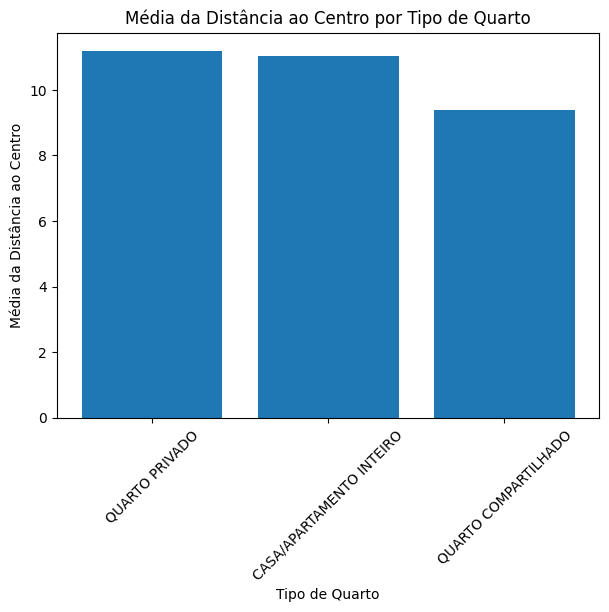

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.bar(df['tipo_quarto'], df['distancia'])
plt.xlabel('Tipo de Quarto')
plt.ylabel('Média da Distância ao Centro')
plt.title('Média da Distância ao Centro por Tipo de Quarto')
plt.xticks(rotation=45)
plt.show()

**Observações:**

O gráfico de barras apresenta a média da distância ao centro para cada tipo de quarto e bom anfitrião. No gráfico, o eixo x representa o tipo de quarto e o eixo y representa a média da distância.

Com base no gráfico, podemos observar que os quartos privados, compartilhados e casa/apartamento têm médias aproximadas, indicando que a distância do centro ao imóvel é similar para esses diferentes tipos de quartos. Isso sugere que a localização em relação ao centro não varia significativamente entre essas categorias de quartos.


## Gráfico de dispersão índice de atração x índice de restaurante

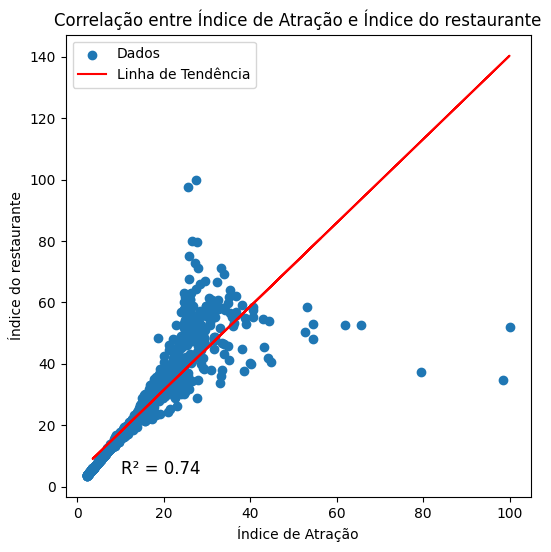

In [ ]:
# importada a biblioteca scipy.stats para usar a linha de tendência e calcula o R^^2
from scipy.stats import linregress

# Cálculo da linha de tendência e do coeficiente de determinação (R^^2)
slope, intercept, r_value, p_value, std_err = linregress(df['indice_atracao'], df['indice_restaurante'])
line = slope * df['indice_restaurante'] + intercept
r_squared = r_value ** 2

# Plotagem do gráfico de dispersão com linha de tendência
plt.figure(figsize=(6, 6))
plt.scatter(df['indice_atracao'], df['indice_restaurante'], label='Dados')
plt.plot(df['indice_restaurante'], line, color='red', label='Linha de Tendência')  # o plt.plot plota a linha de tendência no gráfico
plt.xlabel('Índice de Atração')
plt.ylabel('Índice do restaurante')
plt.title('Correlação entre Índice de Atração e Índice do restaurante')
plt.legend()

# Inclusão do valor do coeficiente de determinação (R^^2)
plt.text(10.0, 4.2, f'R² = {r_squared:.2f}', fontsize=12)

plt.show()

**Observações:**

Podemos observar que há uma correlação forte positiva entre as variáveis "indice_atracao" e "indice_restaurante". Isso indica que, à medida que uma variável aumenta, a outra também tende a aumentar proporcionalmente. Com base nessa observação, podemos formular a hipótese de que as atrações turísticas influenciam o índice dos restaurantes. Além disso, a concentração das atrações no centro pode estar contribuindo para essa correlação.

# Conclusão


* **Perfil de quartos alugados:** Ao analisar as variáveis "tipo_quartos", "quartos", "capacidade" e "bom_anfitrião", foi identificado que a maioria dos quartos alugados no Airbnb são quartos privados com capacidade para 2 pessoas e 1 quarto. Observou-se que o bom anfitrião parece influenciar os aluguéis de quartos privados e casa/apartamento, mas não tem impacto nos quartos compartilhados, como evidenciado no gráfico da relação tipo quarto x bom anfitrião.

* Os imóveis apresentam um alto nível de satisfação, com as seguintes médias:

      CASA/APARTAMENTO INTEIRO: 95.21
      QUARTO COMPARTILHADO: 92.83
      QUARTO PRIVADO: 93.56

* No entanto, o percentual de pessoas que alugaram quartos compartilhados com nível de satisfação próximo à média é baixo, apenas 66.7%. Em contraste, os outros tipos de quartos apresentam as seguintes porcentagens:

       Percentual de CASA/APARTAMENTO INTEIRO com nível de satisfação próximo a 95.21: 84.9%
       Percentual de QUARTO PRIVADO com nível de satisfação próximo a 93.56: 89.4%

* Observou-se uma correlação positiva moderada entre o nível de limpeza e o nível de satisfação dos clientes, indicando que um maior nível de limpeza está associado a um maior nível de satisfação com o quarto.

* Quanto à correlação com a distância, verificou-se que não há uma relação linear entre a distância do imóvel ao centro e o valor do aluguel, assim como a distância não parece influenciar significativamente o nível de satisfação dos clientes. Além disso, não foram identificadas correlações entre as atrações turísticas e o nível de satisfação dos clientes, nem entre os índices dos restaurantes e o nível de satisfação.

* Ao analisar a estatística descritiva da variável distância, observou-se que a distância média ao centro varia de acordo com o tipo de quarto e a classificação do anfitrião.

* Por exemplo, para o tipo de quarto "CASA/APARTAMENTO INTEIRO", a distância média ao centro é menor para anfitriões classificados como bons em comparação com anfitriões não classificados como bons. No entanto, para o tipo de quarto "QUARTO PRIVADO", a distância média ao centro é maior para anfitriões classificados como bons em comparação com anfitriões não classificados como bons. É importante ressaltar que esses resultados são descritivos e requerem análises adicionais para uma compreensão mais aprofundada.

* Com base no gráfico da relação tipo quarto x bom anfitrião, pode-se observar que os quartos privados, compartilhados e casa/apartamento possuem médias de distância ao centro aproximadas, sugerindo que a localização em relação ao centro não varia significativamente entre essas categorias de quartos. Isso indica que os diferentes tipos de quartos possuem uma localização semelhante em termos de proximidade com o centro.

* Identificou-se uma correlação negativa forte entre a distância e o índice de atração, sugerindo que as atrações turísticas estão mais concentradas próximas ao centro da cidade. No entanto, não foram encontradas correlações entre as atrações turísticas e o valor do aluguel, indicando que as atrações não parecem influenciar diretamente os preços dos aluguéis.

* Além disso, observou-se uma correlação forte positiva entre o índice de atração e o índice de restaurantes, o que indica que as atrações turísticas podem influenciar o índice dos restaurantes. É possível formular a hipótese de que as atrações turísticas têm um impacto positivo nos restaurantes, e essa relação pode ser reforçada pela concentração das atrações no centro da cidade.

* O gráfico de dispersão entre o índice de restaurante e a distância revelou uma correlação forte negativa. Isso sugere que quanto menor a distância do imóvel ao centro, maior é o índice de satisfação com os restaurantes. No entanto, essacorrelação não indica uma influência direta dos restaurantes na satisfação global dos clientes.

* Também foi identificada uma correlação moderada positiva entre a distância e a distância do metrô. Isso sugere que as estações de metrô estão localizadas próximas ao centro, o que indica uma boa localização em termos de acessibilidade e conveniência para os locatários dos imóveis analisados.

Em resumo, a análise revelou informações importantes sobre o perfil dos quartos alugados, as correlações entre variáveis relevantes e insights sobre a influência da localização, limpeza, atrações turísticas, restaurantes e bom anfitrião nos aluguéis e satisfação dos clientes. Essas informações podem ser úteis para proprietários de imóveis ao definir preços competitivos, entender as preferências e necessidades dos clientes, e identificar possíveis oportunidades e ameaças no mercado de aluguéis de curta duração.

